In [42]:
##Import 
import json
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
# from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFECV
#import dataset
pokemon = pd.read_csv('./pokedex/pokemon.csv').sort_values(by=['number'])
# pokemon
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [43]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 898 entries, 0 to 181
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   generation    898 non-null    int64  
 1   number        898 non-null    int64  
 2   name          898 non-null    object 
 3   image         898 non-null    object 
 4   type1         898 non-null    object 
 5   type2         444 non-null    object 
 6   height        898 non-null    float64
 7   weight        898 non-null    float64
 8   catch_rate    898 non-null    int64  
 9   egg_group1    782 non-null    object 
 10  egg_group2    256 non-null    object 
 11  has_gender    898 non-null    bool   
 12  male          776 non-null    float64
 13  hp            898 non-null    int64  
 14  hp_min        898 non-null    int64  
 15  hp_max        898 non-null    int64  
 16  attack        898 non-null    int64  
 17  attack_min    898 non-null    int64  
 18  attack_max    898 non-null    

In [44]:
types = set.union(set(pokemon['type1'].value_counts().keys()), set(pokemon['type2'].value_counts().keys()))
egg_groups = set.union(set(pokemon['egg_group1'].value_counts().keys()), set(pokemon['egg_group2'].value_counts().keys()))
new_types = {k: v+1 for v, k in enumerate(types)}
new_egg_groups = {k: v+1 for v, k in enumerate(egg_groups)}
tf = { True: 1, False: 0}

data = pokemon.drop(columns=['number', 'name', 'image', 'total']) \
    .fillna(value=0) \
    .replace({"type1": new_types, "type2": new_types}) \
    .replace({"egg_group1": new_egg_groups, "egg_group2": new_egg_groups}) \
    .replace({"has_gender": tf, "is_legendary": tf})
data

,generation,type1,type2,height,weight,catch_rate,egg_group1,egg_group2,has_gender,male,...,sp_atk,sp_atk_min,sp_atk_max,sp_def,sp_def_min,sp_def_max,speed,speed_min,speed_max,is_legendary
0,1,18,6,0.7,6.9,45,13,6,1,87.5,...,65,121,251,65,121,251,45,85,207,0
23,1,18,6,1.0,13.0,45,13,6,1,87.5,...,80,148,284,80,148,284,60,112,240,0
25,1,18,6,2.0,100.0,45,13,6,1,87.5,...,100,184,328,100,184,328,80,148,284,0
24,1,5,0,0.6,8.5,45,8,6,1,87.5,...,60,112,240,50,94,218,65,121,251,0
22,1,5,0,1.1,19.0,45,8,6,1,87.5,...,80,148,284,65,121,251,80,148,284,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,8,2,0,1.2,145.0,3,0,0,0,0.0,...,100,184,328,50,94,218,200,364,548,1
184,8,9,0,2.1,200.0,3,0,0,0,0.0,...,100,184,328,50,94,218,80,148,284,1
183,8,8,0,2.2,800.0,3,0,0,0,0.0,...,65,121,251,110,202,350,30,58,174,1
182,8,16,0,2.0,44.5,3,0,0,0,0.0,...,145,265,427,80,148,284,130,238,394,1


In [45]:
d = data.drop(columns=['generation', 'is_legendary'])
scaler = StandardScaler()
scaler.fit(d)
X_scale = scaler.transform(d)
scaled_data = pd.DataFrame(X_scale, columns=d.columns)
scaled_data.head()

,type1,type2,height,weight,catch_rate,egg_group1,egg_group2,has_gender,male,hp,...,defense_max,sp_atk,sp_atk_min,sp_atk_max,sp_def,sp_def_min,sp_def_max,speed,speed_min,speed_max
0,1.753838,0.083187,-0.393965,-0.475111,-0.689092,1.370181,0.781071,0.396505,1.492357,-0.917252,...,-0.773323,-0.159472,-0.159382,-0.161166,-0.181365,-0.181376,-0.183270,-0.736514,-0.736455,-0.738638
1,1.753838,0.083187,-0.150761,-0.425128,-0.689092,1.370181,0.781071,0.396505,1.492357,-0.344713,...,-0.297035,0.351492,0.351509,0.349636,0.372726,0.372693,0.370803,-0.209174,-0.209167,-0.211527
2,1.753838,0.083187,0.659918,0.287747,-0.689092,1.370181,0.781071,0.396505,1.492357,0.418671,...,0.378988,1.032778,1.032696,1.030705,1.111514,1.111453,1.109567,0.493945,0.493884,0.491287
3,-0.594671,-0.844786,-0.475032,-0.462001,-0.689092,0.208528,0.781071,0.396505,1.492357,-1.146267,...,-0.973057,-0.329794,-0.329679,-0.331434,-0.735456,-0.735446,-0.737343,-0.033394,-0.033404,-0.035824
4,-0.594671,-0.844786,-0.069693,-0.375964,-0.689092,0.208528,0.781071,0.396505,1.492357,-0.421052,...,-0.466040,0.351492,0.351509,0.349636,-0.181365,-0.181376,-0.183270,0.493945,0.493884,0.491287


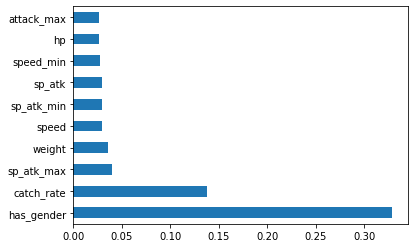

In [46]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

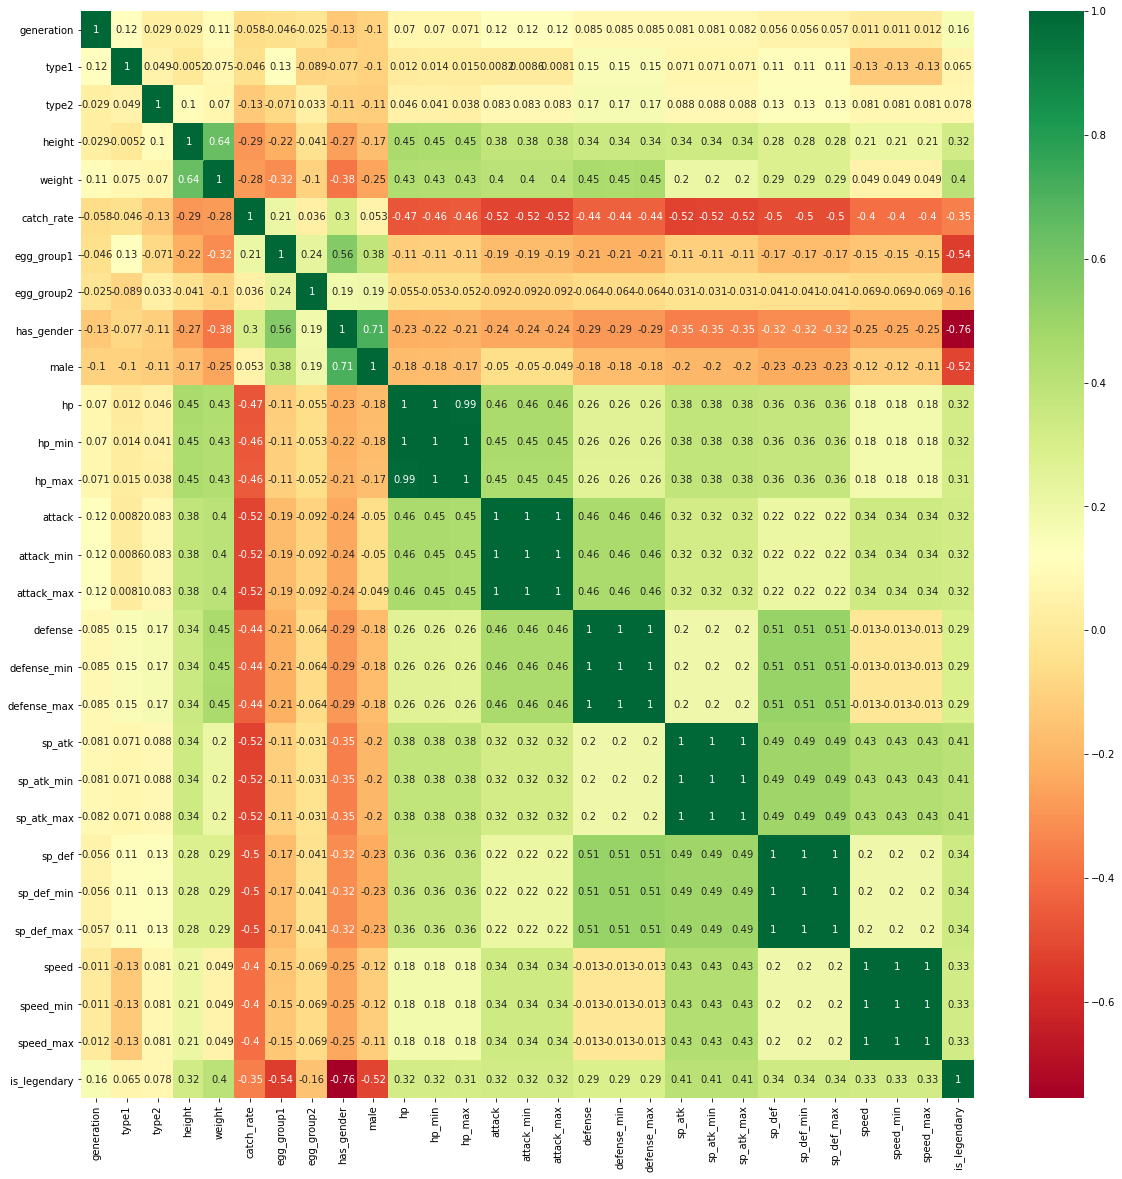

In [47]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## Model Training


In [48]:
import pandas
import numpy## Model Training

import re
import sklearn


# Supervised Learning Modules
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
# Plotting
from matplotlib import pyplot
%matplotlib inline



import warnings
warnings.filterwarnings('ignore')

In [49]:
#feature selection
#apply SelectKBest class to extract top 10 best features
X = data.iloc[:,0:-2]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.01343666 0.02147538 0.02003741 0.03550391 0.13773111 0.32871417
 0.02720556 0.02479862 0.02081957 0.02311313 0.0248933  0.02654494
 0.0169894  0.01746328 0.01865496 0.02974576 0.02986572 0.03973165
 0.02054493 0.01933788 0.0197544  0.02995302 0.02784149 0.02584375]


In [50]:
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('SVM', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('LDA', SVC()))
models.append(('RF', RandomForestClassifier(n_jobs = -1, n_estimators = 500)))

In [51]:
# evaluate each model in turn

def run_models_precision(train_data, title):
    results = []
    names = []

    for name, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state=seed)
        cv_results = model_selection.cross_val_score(model, train_data, y, cv=kfold, scoring='precision')
        results.append(cv_results)
        names.append(name)
        std=cv_results.std()/10
        msg = "%s: %f (%f)" % (name, cv_results.mean(), std)
        print(msg)
#         print(cv_results)

    # boxplot algorithm comparison
    fig = pyplot.figure()
    fig.suptitle(title)
    ax = fig.add_subplot(111)
    pyplot.boxplot(results)
    ax.set_xticklabels(names)
    pyplot.ylim(0,1)
    pyplot.show()

In [52]:
# evaluate each model in turn

def run_models_accuracy(train_data, title):
    results = []
    names = []

    for name, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state=seed)
        cv_results = model_selection.cross_val_score(model, train_data, y, cv=kfold, scoring='accuracy')
        results.append(cv_results)
        names.append(name)
        std=cv_results.std()/10
        msg = "%s: %f (%f)" % (name, cv_results.mean(), std)
        print(msg)
#         print(cv_results)

    # boxplot algorithm comparison
    fig = pyplot.figure()
    fig.suptitle(title)
    ax = fig.add_subplot(111)
    pyplot.boxplot(results)
    ax.set_xticklabels(names)
    pyplot.ylim(0,1)
    pyplot.show()

In [53]:
# evaluate each model in turn

def run_models_recall(train_data, title):
    results = []
    names = []

    for name, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state=seed)
        cv_results = model_selection.cross_val_score(model, train_data, y, cv=kfold, scoring='recall')
        results.append(cv_results)
        names.append(name)
        std=cv_results.std()/10
        msg = "%s: %f (%f)" % (name, cv_results.mean(), std)
        print(msg)
#         print(cv_results)

    # boxplot algorithm comparison
    fig = pyplot.figure()
    fig.suptitle(title)
    ax = fig.add_subplot(111)
    pyplot.boxplot(results)
    ax.set_xticklabels(names)
    pyplot.ylim(0,1)
    pyplot.show()

In [54]:
data=pokemon[['generation', 'number', 'height',
       'weight', 'catch_rate', 'has_gender', 'hp', 'hp_min', 'hp_max', 'attack', 'attack_min', 'attack_max',
       'defense', 'defense_min', 'defense_max', 'sp_atk', 'sp_atk_min',
       'sp_atk_max', 'sp_def', 'sp_def_min', 'sp_def_max', 'speed',
       'speed_min', 'speed_max', 'total', 'is_legendary']]

LR: 0.974282 (0.002754)
SVM: 0.947628 (0.002353)
KNN: 0.954170 (0.005295)
CART: 0.973171 (0.002895)
NB: 0.952035 (0.002365)
LDA: 0.973134 (0.003699)
RF: 0.980936 (0.003220)


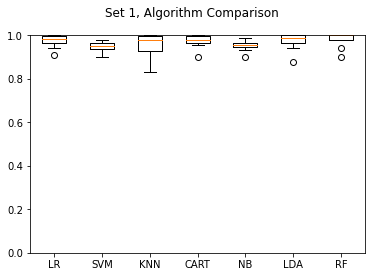

In [55]:
run_models_accuracy(X, title= 'Set 1, Algorithm Comparison')

In [56]:
# create the output feature dataframe by selecting the output feature from the whole dataset
output_feature = data.is_legendary

# create the input feature dataframe by dropping the output feature column 
# (the axis parameter deontes whether to drop the row, axis = 0, or column, axis = 1).
input_features = data.drop('is_legendary',axis = 1)


In [57]:
#splitting data into training and testing set
from sklearn.model_selection import train_test_split
# create the output feature dataframe by selecting the output feature from the whole dataset
output_feature = data.is_legendary

# create the input feature dataframe by dropping the output feature column 
# (the axis parameter deontes whether to drop the row, axis = 0, or column, axis = 1).
input_features = data.drop('is_legendary',axis = 1)

x_train, x_test, y_train, y_test = train_test_split(input_features, output_feature, test_size = 0.2, random_state = 0)


In [58]:
#training model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 10000)
lr.fit(x_train,y_train)

#getting confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
y_pred = lr.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

#checking accuracy
from sklearn.metrics import accuracy_score
lra = accuracy_score(y_test,y_pred)
print('accuracy score = ',lra)
print("Classification Report",classification_report(y_test,y_pred))

confusion matrix:
 [[147   2]
 [  9  22]]
accuracy score =  0.9388888888888889
Classification Report               precision    recall  f1-score   support

       False       0.94      0.99      0.96       149
        True       0.92      0.71      0.80        31

    accuracy                           0.94       180
   macro avg       0.93      0.85      0.88       180
weighted avg       0.94      0.94      0.94       180

